In [13]:
from scipy.io import netcdf
import numpy
from davitpy.pydarn.radar import *
from davitpy.pydarn.plotting import *
from davitpy.utils import *
import netCDF4
import cdf
import pandas
import aacgmv2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fName = "../data/sdr/f18/20141216/PS.APL_V0116S024CB0005_SC.U_DI.A_GP.F18-SSUSI_PA.APL-SDR-DISK_DD.20141216_SN.26612-00_DF.NC"
# fName = "../data/sdr/f17/20141216/PS.APL_V0116S024CE0008_SC.U_DI.A_GP.F17-SSUSI_PA.APL-SDR-DISK_DD.20141216_SN.41867-00_DF.NC"
# fName = "../data/sdr/f16/20141216//PS.APL_V0116S024CE0018_SC.U_DI.A_GP.F16-SSUSI_PA.APL-SDR-DISK_DD.20141216_SN.57587-00_DF.NC"

In [3]:
fh = netcdf.netcdf_file(fName, mmap=False)

lats = fh.variables['PIERCEPOINT_DAY_LATITUDE'].data
lons = fh.variables['PIERCEPOINT_DAY_LONGITUDE'].data
alts = fh.variables['PIERCEPOINT_DAY_ALTITUDE'].data

sc_lat = fh.variables['LATITUDE_DAY'].data.ravel()
sc_lon = fh.variables['LONGITUDE_DAY'].data.ravel()
sc_alt = fh.variables['ALTITUDE_DAY'].data.ravel()

In [4]:
for va in fh.variables.keys():
    if "ORBIT" in va:
        print va

ORBIT_DAY
ORBIT_DAY_AURORAL
ORBIT_NIGHT


In [5]:
data1 = fh.variables['DISK_INTENSITY_DAY'].data[:, :, 2]
data2 = fh.variables['DISK_INTENSITY_DAY'].data[:, :, 3]
data3 = fh.variables['DISK_INTENSITY_DAY'].data[:, :, 4]

In [6]:
print data1.shape
print lats.shape
print fh.variables['TIME_DAY'].data.shape
# uselats = numpy.nanmin(lats, axis=0) > 45

(42, 1632)
(42, 1632)
(1632,)


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


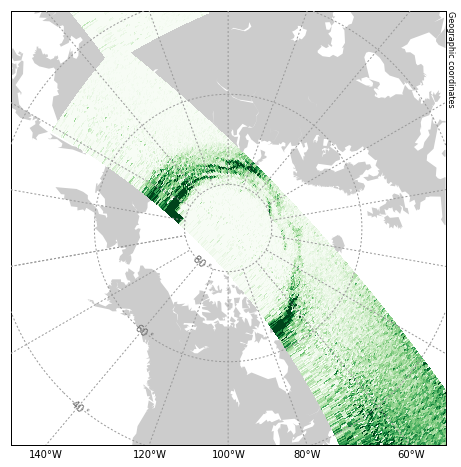

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = plotUtils.mapObj(boundinglat=40., coords='geo')

p = m.pcolormesh(lons, lats, data1, latlon=True, zorder=1.9,
                        vmin=0, vmax=1000,
                        ax=ax, alpha=1, cmap='Greens')

p.set_rasterized(True)

fig.savefig("../figs/ssusi-test.pdf",bbox_inches='tight')

In [8]:
x = fh.variables['TIME_EPOCH_DAY'].data[0]
print x, type( fh.variables['TIME_EPOCH_DAY'].data[0] )
print datetime.datetime.fromtimestamp(x/1e3).strftime('%c')
# print lats[:,0]
# print lons[:,0]

6.35859474413e+13 <type 'numpy.float64'>
Sun Dec 16 06:10:41 3984


In [9]:
dtVar = fh.variables['TIME_EPOCH_DAY'][:]
# dt2 = netCDF4.num2date(dtVar)

In [10]:
currDataSet = netCDF4.Dataset(fName)
epochList = currDataSet.variables["TIME_EPOCH_DAY"][:]
# account for difference in seconds between
                    # CDF epoch and python's epoch, leap year in there
                    # (datetime(1971,1,2) - 
                    #      datetime(1,1,1)).total_seconds()*1000
# epochList = epochList - 62167219200000
a = epochList[0]
print datetime.datetime.fromtimestamp(a/1e3)
sc_time = [datetime.datetime(2014, 12, 16) + datetime.timedelta(seconds=x) for x in fh.variables['TIME_DAY'].data.ravel()]
print sc_time[0]

3984-12-16 06:10:41.331001
2014-12-16 11:10:41.331119


In [11]:
latColList = [ "glat." + str(cNum+1) for cNum in range(lats.shape[0]) ]
dfLat = pandas.DataFrame(lats.T,columns=latColList, index=epochList)
lonColList = [ "glon." + str(cNum+1) for cNum in range(lons.shape[0]) ]
dfLon = pandas.DataFrame(lons.T,columns=lonColList, index=epochList)
ssusiDF = reduce(lambda left,right: pandas.merge(left,right,\
                         left_index=True, right_index=True), [ dfLat, \
                        dfLon ])

ssusiDF[ ["glat.1", "glat.2", "glat.3", "glon.1", "glon.2", "glon.3"] ].head()

,glat.1,glat.2,glat.3,glon.1,glon.2,glon.3
6.358595e+13,46.175049,46.265045,46.295895,141.285309,138.757355,136.857376
6.358595e+13,46.386745,46.478828,46.510975,141.290359,138.752792,136.845428
6.358595e+13,46.598408,46.692589,46.726036,141.295914,138.748596,136.833755
6.358595e+13,46.810043,46.906334,46.941090,141.301941,138.744781,136.822388
6.358595e+13,47.021645,47.120056,47.156128,141.308472,138.741348,136.811325


In [12]:
print lats[:,0]
print "--------------------------"
print lons[:,0]

[ 46.17504883  46.26504517  46.29589462  46.29896545  46.28803635
  46.26311493  46.2352562   46.21232986  46.18592072  46.15604019
  46.12269211  46.08588791  46.04563522  46.0019455   45.95482254
  45.90428925  45.85034561  45.79301071  45.7322998   45.66822433
  45.60079956  45.53003693  45.45596313  45.37858582  45.29792786
  45.21400452  45.12683868  45.03644562  44.94284439  44.84606171
  44.74611282  44.64302063  44.53680801  44.42750168  44.31511688
  44.19968414  44.08121872  43.95975494  43.83531189  43.70791245
  43.57758713  43.4443512 ]
--------------------------
[ 141.28530884  138.75735474  136.8573761   135.5900116   134.3228302
  133.05647278  132.1076355   131.47566223  130.84425354  130.21348572
  129.58343506  128.95419312  128.32582092  127.69838715  127.07198334
  126.44667053  125.82252502  125.19962311  124.57803345  123.95781708
  123.33905029  122.72179413  122.10610962  121.49207306  120.87973785
  120.26916504  119.66041565  119.05354309  118.4486084   117.8

In [23]:
mlat, mlon = aacgmv2.convert(46.2, 141.3, 300, datetime.datetime(2013, 11, 3))
print mlat, mlon

def my_test2(row):
    mlat, mlon = aacgmv2.convert(row["glat.1"], row["glon.1"],\
                           300, datetime.datetime(2013, 11, 3))
    

41.1617752352 -146.207198457


In [22]:
ssusiDF.head()

,glat.1,glat.2,glat.3,glat.4,glat.5,glat.6,glat.7,glat.8,glat.9,glat.10,...,glon.35,glon.36,glon.37,glon.38,glon.39,glon.40,glon.41,glon.42,p1,p2
6.358595e+13,46.175049,46.265045,46.295895,46.298965,46.288036,46.263115,46.235256,46.212330,46.185921,46.156040,...,114.862556,114.272591,113.684944,113.099663,112.516785,111.936340,111.358376,110.782913,41.137622,-146.219652
6.358595e+13,46.386745,46.478828,46.510975,46.514778,46.504478,46.480080,46.452541,46.429794,46.403542,46.373787,...,114.766998,114.175102,113.585556,112.998405,112.413696,111.831459,111.251740,110.674561,41.346286,-146.220750
6.358595e+13,46.598408,46.692589,46.726036,46.730579,46.720909,46.697033,46.669819,46.647255,46.621155,46.591534,...,114.670807,114.076950,113.485489,112.896454,112.309898,111.725853,111.144356,110.565445,41.555052,-146.221746
6.358595e+13,46.810043,46.906334,46.941090,46.946373,46.937332,46.913982,46.887093,46.864708,46.838764,46.809269,...,114.573975,113.978134,113.384735,112.793800,112.205376,111.619507,111.036224,110.455566,41.763926,-146.222674
6.358595e+13,47.021645,47.120056,47.156128,47.162151,47.153748,47.130924,47.104359,47.082157,47.056366,47.026997,...,114.476471,113.878647,113.283287,112.690430,112.100128,111.512413,110.927330,110.344910,41.972898,-146.223512
